#Relatório semanal

Esse relatório foi feito em Python com a utilização da biblioteca Pandas:

Primeiro, foi feito a importação da biblioteca necessária:

In [ ]:
import pandas as pd

- Com os dados oferecidos, foi criada a tabela de despesas semanal

In [ ]:
dados = {
        'Limpeza':[100, 0, 100, 0, 100, 100, 0],
        'Comida':[221.60, 375.31, 412.00, 495.20, 411.53, 245.00, 164.00],
        'Transporte' : [150, 100, 125, 300, 275, 525, 75],
        'Outros' : [0, 0, 2310, 500, 0, 0, 820]
}

relatorio = pd.DataFrame(dados, index = ['segunda', 'terca', 'quarta', 'quinta', 'sexta', 'sabado','domingo'])
relatorio

,Limpeza,Comida,Transporte,Outros
Segunda,100,221.60,150,0
Terça,0,375.31,100,0
Quarta,100,412.00,125,2310
Quinta,0,495.20,300,500
Sexta,100,411.53,275,0
Sábado,100,245.00,525,0
Domingo,0,164.00,75,820


- Foi adicionado na tabela posteriormente a coluna "Ganhos"

In [ ]:
relatorio['Ganhos'] = [2200, 2420.50, 3391, 5322, 4898.50, 4200, 3893]
relatorio

,Limpeza,Comida,Transporte,Outros,Ganhos
Segunda,100,221.60,150,0,2200.0
Terça,0,375.31,100,0,2420.5
Quarta,100,412.00,125,2310,3391.0
Quinta,0,495.20,300,500,5322.0
Sexta,100,411.53,275,0,4898.5
Sábado,100,245.00,525,0,4200.0
Domingo,0,164.00,75,820,3893.0


#### Resolução dos cálculos:

######*Subtração dos impostos dos ganhos diários:*

Foi solicitado a subtração dos impostos dos ganhos diários, para realizar esse cálculo, temos que o valor do imposto é de 7%.

Considerando o valor de ganho diário como 100%, para obter o valor do imposto a ser pago diariamente, basta multiplicar o ganho diário por 0.07:

In [ ]:
imposto = relatorio['Ganhos'] * 0.07
imposto


Segunda    154.000
Terça      169.435
Quarta     237.370
Quinta     372.540
Sexta      342.895
Sábado     294.000
Domingo    272.510
Name: Ganhos, dtype: float64

Temos também o valor total de imposto a ser pago nessa semana:

In [ ]:
imposto.sum()

1842.75

Será pago um total de 1.842,75R$ em impostos.

Subtraindo a série "imposto" da série "ganhos", temos os ganhos diários com imposto descontado:



In [ ]:
ganho_liquido = relatorio['Ganhos'] - imposto
ganho_liquido

Segunda    2046.000
Terça      2251.065
Quarta     3153.630
Quinta     4949.460
Sexta      4555.605
Sábado     3906.000
Domingo    3620.490
Name: Ganhos, dtype: float64

Para complementar e facilitar a visualização, é possível ver esses resultados em um gráfico de barra horizontal:

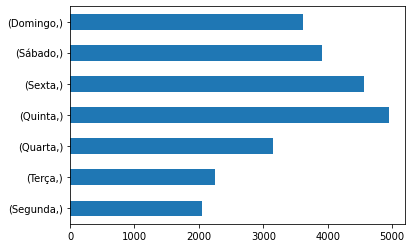

In [ ]:
ganho_liquido.plot(kind = 'barh')

É possível concluir que:
* Quinta foi o dia em que as vendas foram maiores;
* Segunda foi o dia que as vendas foram menores;
* Na quarta as vendas começaram a cair;
* No domingo as vendas começaram a subir;

######*A Soma total dos ganhos:*

Para calcular a soma dos ganhos, basta utilizar a função sum() nos ganhos liquidos

In [ ]:
ganho_liquido.sum()

24482.25

Assim, temos como resultado um total de 24.482,25R$ de ganho nessa semana (com impostos já descontados);

######*A média semanal dos ganhos:*

Para calcular a média dos ganhos, basta utilizar a função mean() nos ganhos liquidos:

In [ ]:
ganho_liquido.mean()

3497.464285714286

Assim, temos como média semanal um total de 3.497,50R$ por dia;

######*A soma total das despesas por categoria:*

Para conseguir a soma total das despesas por categoria, primeiro selecionamos apenas as colunas referentes as despezas e depois utilizamos a função sum() para somar. O seguinte resultado foi obtido:

In [ ]:
despesa_por_categoria = relatorio[['Limpeza', 'Comida', 'Transporte', 'Outros']].sum()
despesa_por_categoria

Limpeza        400.00
Comida        2324.64
Transporte    1550.00
Outros        3630.00
dtype: float64

É possível ver esses resultados em um gráfico:

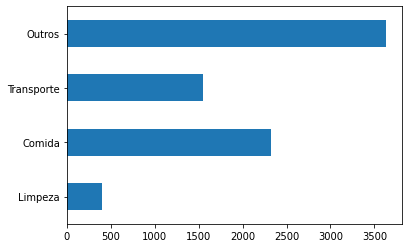

In [ ]:
despesa_por_categoria.plot(kind = 'barh')

É possível concluir que:
* As despesas com limpeza foram as mais baixas;
* As despezas com "Outros" são muito altas (45% do valor das despezas);

######*A média semanal de todas as despesas:*

Primeiro, selecionamos apenas as colunas referentes as despezas e utilizamos a função sum com o parâmetro axis = 'columns' para visualizar quanto foi gasto a cada dia da semana.


In [ ]:
despesas_diarias = relatorio[['Limpeza', 'Comida', 'Transporte', 'Outros']].sum(axis = 'columns')
despesas_diarias

Segunda     471.60
Terça       475.31
Quarta     2947.00
Quinta     1295.20
Sexta       786.53
Sábado      870.00
Domingo    1059.00
dtype: float64

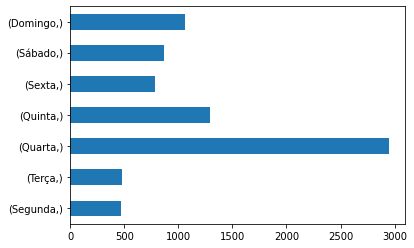

In [ ]:
despesas_diarias.plot(kind='barh')

É possível concluir que:
* Segunda e Terça foram os dias com menores gastos com despezas;
* Na quarta foi o dia em que os gastos foram maiores (37% dos gastos);

Por fim, para calcular a média semanal, basta utilizar a função mean()

In [ ]:
despesas_diarias.mean()

1129.2342857142855

Temos como média semanal de todas as despesas um valor de 1.129R$ por dia.

######*O lucro diario para informar qual dia foi mais lucrativo e o lucro total da semana:*

Subtraindo a série "despesas_diarias" da série "ganho_liquido" temos o lucro diário de cada dia da semana:

In [ ]:
lucro_total = ganho_liquido - despesas_diarias
lucro_total

Segunda    1574.400
Terça      1775.755
Quarta      206.630
Quinta     3654.260
Sexta      3769.075
Sábado     3036.000
Domingo    2561.490
dtype: float64

Podemos visualizar esses dados em um gráfico:

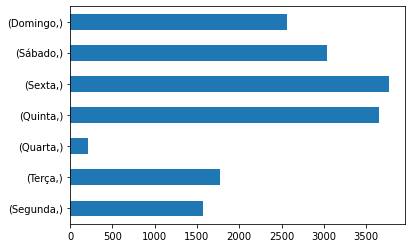

In [ ]:
lucro_total.plot(kind = 'barh')

É possível concluir que:
* Sexta foi o dia mais lucrativo
* Quarta foi dia menos lucrativo

Para finalizar, calculamos o lucro total da semana da seguinte forma:

In [ ]:
lucro_total.sum()

16577.61

Durante a semana analizada, descontando impostos e despesas, a loja teve 16.577R$ de lucro